# Time series forcasting on daily minimal temperatures

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow.keras as ks

## Create function to create time shift series and load data

In [7]:
def tweak_daily_min_temperature(df_):
    return (df_.assign(Date = lambda df: # date as datetime localized at Melbourne 
                       df.Date.astype('datetime64').dt.tz_localize('Australia/Melbourne')
                      )
            .set_index('Date') # Use date column as index
            # Use time_series_to_supervised_learning function to additionally obtain shifted column of data
            .pipe((time_series_to_supervised_learning, 'df_'), n_shift_back=1)
           )

def time_series_to_supervised_learning(df_, n_shift_back=None, n_shift_forward=None, dropna=True):
    '''Function is designed to create new columns of all existing columns of df_. df_is seen as a time series.
    Thus, it is recommended to store all time information in index.
    df_ is time series pandas.Series or pandas.DataFrame
    n_shift_back is integer of how often index should be shiftet backwards. Creating new columns each shift.
    n_shift_forward is integer of how often index should be shiftet forwards. Creating new columns each shift.'''
    # Storing all column labels of initial DataFrame
    cols = df_.columns.values
    # Step through all backward time steps, when some were given
    if n_shift_back != None:
        for i in range(1, n_shift_back + 1):
            # dictionary to store new columns assignments in
            shift_dict = {}
            # step through all columns of initial DataFrame
            for _, col in enumerate(cols):
                # construct name of new (shiftet in time) column
                col_name = col + '(t' + str(-i) + ')'
                # store command to shift column in dictionary and use constructed column name as key
                shift_dict.update({col_name: df_[col].shift(i)})
            df_ = df_.assign(**shift_dict)
            # read colum names, so they can be ordered afterwards
            temporary_cols = list(df_.columns)
            # slice of the new columns assigned to the right of df_ and sort them before all other columns
            new_cols = temporary_cols[-len(cols):] + temporary_cols[:-len(cols)]
            # Reorder columns to new order
            df_ = df_[new_cols]
    if n_shift_forward != None:
        for i in range(1, n_shift_forward+1):
            # dictionary to store new columns assignments in
            shift_dict = {}
            # step through all columns of initial DataFrame
            for _, col in enumerate(cols):
                # construct name of new (shifted in time) column
                col_name = col + '(t+' + str(i) + ')'
                # store command to shift column in dictionary and use constructed column name as key
                shift_dict.update({col_name: df[col].shift(-i)})
            df_ = df_.assign(**shift_dict)
    # Drop rows with NA, if defined by dropna and return DataFrame                
    if dropna:
        return df_.dropna()
    else:
        return df_

In [11]:
# Load dataset in a pandas DataFrame
df_raw = pd.read_csv('daily-min-temperatures.csv')
# Use tweak function to set index to local Melbourne time and add shifted column (y) for supervised learning
df = tweak_daily_min_temperature(df_raw)

In [78]:
# Initialize scaler and use it to obtain numpy array of data scaled to values 0 to 1.
scaler = MinMaxScaler(copy=False)
x_scaled = scaler.fit_transform(df.to_numpy())
# Split off two datasets to be used as training  and evaluation datasets
split_index = int(len(data_scaled)*0.67)
x_train = data_scaled[:split_index, 0]
x_eval = data_scaled[split_index:, 0]
# Sclice off y-data 
y_train = data_scaled[:split_index, 1]
y_eval = data_scaled[split_index:, 1]
# Bring numpy array to shape (samples, timesteps, features), where timesteps=1, features=1
x_train = x_train.reshape(x_train.shape[0], 1, 1)
y_train = y_train.reshape(y_train.shape[0], 1, 1)
x_eval = x_eval.reshape(x_eval.shape[0], 1, 1)
y_eval = y_eval.reshape(y_eval.shape[0], 1, 1)

## Define model and train it

In [69]:
RNN = ks.Sequential()
RNN.add(ks.layers.LSTM(10, input_shape=(1, 1), return_sequences=True)) #hidden layer
RNN.add(ks.layers.LSTM(1, return_sequences=True)) # output layer

RNN.compile(loss='mean_squared_error', metrics='accuracy', optimizer='adam') 

# List to add up values of loss function during training
history_buffer_loss = []

2023-05-12 13:55:32.697401: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-12 13:55:32.699200: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-12 13:55:32.700954: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/30


2023-05-12 13:55:40.743509: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-12 13:55:40.745439: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-12 13:55:40.747009: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

77/77 [==============================] - 3s 3ms/step - loss: 0.1793 - accuracy: 8.1833e-04
Epoch 2/30
77/77 [==============================] - 0s 4ms/step - loss: 0.1315 - accuracy: 8.1833e-04
Epoch 3/30
77/77 [==============================] - 0s 4ms/step - loss: 0.0761 - accuracy: 8.1833e-04
Epoch 4/30
77/77 [==============================] - 0s 4ms/step - loss: 0.0364 - accuracy: 8.1833e-04
Epoch 5/30
77/77 [==============================] - 0s 4ms/step - loss: 0.0218 - accuracy: 8.1833e-04
Epoch 6/30
77/77 [==============================] - 0s 4ms/step - loss: 0.0185 - accuracy: 8.1833e-04
Epoch 7/30
77/77 [==============================] - 0s 4ms/step - loss: 0.0177 - accuracy: 8.1833e-04
Epoch 8/30
77/77 [==============================] - 0s 4ms/step - loss: 0.0173 - accuracy: 0.0012
Epoch 9/30
77/77 [==============================] - 0s 4ms/step - loss: 0.0168 - accuracy: 0.0012
Epoch 10/30
77/77 [==============================] - 0s 4ms/step - loss: 0.0163 - accuracy: 0.0012
Ep

Text(0.5, 0.98, 'Loss function')

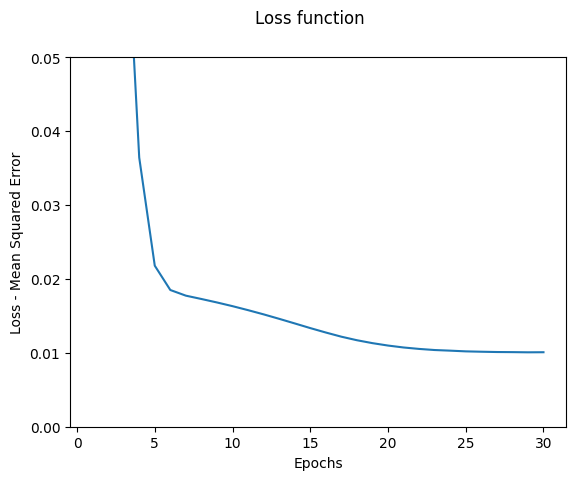

In [70]:
# Fit model on training data
history = RNN.fit(x_train, y_train, epochs=30)
# Adding up information about loss for each epoch
history_buffer_loss += history.history['loss']
# plotting loss function
fig, ax = plt.subplots()
ax.set_ylim(bottom=0, top=0.05) #top=np.max(history_buffer_loss).round(1) + 0.1)
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss - Mean Squared Error')
ax.plot(list(range(1, len(history_buffer_loss) + 1)), history_buffer_loss)
fig.suptitle('Loss function')

In [76]:
y_eval_predict = RNN.predict(x_eval)[:, 0]
scaler.inverse_transform(y_eval_predict)


38/38 [==============================] - 0s 2ms/step


ValueError: non-broadcastable output operand with shape (1205,1) doesn't match the broadcast shape (1205,2)

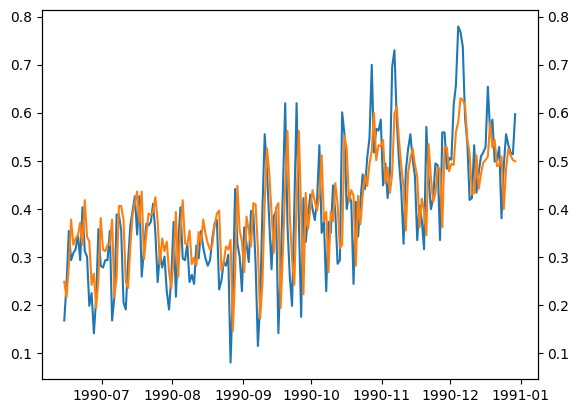

In [79]:
fig, ax = plt.subplots()

ax2 = ax.twinx()
ax2.sharey(ax)

ax.plot(df.index.values[-200:-1], df.Temp.iloc[-200:-1])
ax.plot(df.index.values[-200:-1], y_eval_predict[-200:-1])